In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Aprendizaje no supervisado: algoritmos de clustering jerárquicos y basados en densidades

En el cuaderno número 8, introdujimos uno de los algoritmos de agrupamiento más básicos y utilizados, el K-means. Una de las ventajas del K-means es que es extremadamente fácil de implementar y que es muy eficiente computacionalmente si lo comparamos a otros algoritmos de agrupamiento. Sin embargo, ya vimos que una de las debilidades de K-Means es que solo trabaja bien si los datos a agrupar se distribuyen en formas esféricas. Además, tenemos que decidir un número de grupos, *k*, *a priori*, lo que puede ser un problema si no tenemos conocimiento previo acerca de cuántos grupos esperamos obtener.

En este cuaderno, vamos a ver dos formas alternativas de hacer agrupamiento, agrupamiento jerárquico y agrupamiento basado en densidades. 

# Agrupamiento jerárquico

Una característica importante del agrupamiento jerárquico es que podemos visualizar los resultados como un dendograma, un diagrama de árbol. Utilizando la visualización, podemos entonces decidir el umbral de profundidad a partir del cual vamos a cortar el árbol para conseguir un agrupamiento. En otras palabras, no tenemos que decidir el número de grupos sin tener ninguna información. 

### Agrupamiento aglomerativo y divisivo

Además, podemos distinguir dos formas principales de clustering jerárquico: divisivo y aglomerativo. En el clustering aglomerativo, empezamos con un único patrón por clúster y vamos agrupando clusters (uniendo aquellos que están más cercanos), siguiendo una estrategia *bottom-up* para construir el dendograma. En el clustering divisivo, sin embargo, empezamos incluyendo todos los puntos en un único grupo y luego vamos dividiendo ese grupo en subgrupos más pequeños, siguiendo una estrategia *top-down*.

Nosotros nos centraremos en el clustering aglomerativo.

### Enlace simple y completo

Ahora, la pregunta es cómo vamos a medir la distancia entre ejemplo. Una forma habitual es usar la distancia Euclídea, que es lo que hace el algoritmo K-Means.

Sin embargo, el algoritmo jerárquico requiere medir la distancia entre grupos de puntos, es decir, saber la distancia entre un clúster (agrupación de puntos) y otro. Dos formas de hacer esto es usar el enlace simple y el enlace completo.

En el enlace simple, tomamos el par de puntos más similar (basándonos en distancia Euclídea, por ejemplo) de todos los puntos que pertenecen a los dos grupos. En el enlace competo, tomamos el par de puntos más lejano.
![](figures/clustering-linkage.png)


Para ver como funciona el clustering aglomerativo, vamos a cargar el dataset Iris (pretendiendo que no conocemos las etiquetas reales y queremos encontrar las espacies):

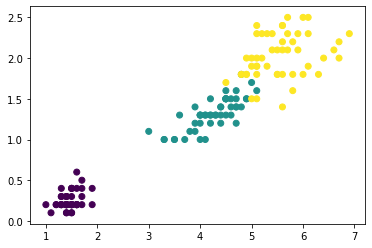

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
n_samples, n_features = X.shape

plt.scatter(X[:, 0], X[:, 1], c=y);

Ahora vamos haciendo una exploración basada en clustering, visualizando el dendograma utilizando las funciones `linkage` (que hace clustering jerárquico) y `dendrogram` (que dibuja el dendograma) de SciPy:

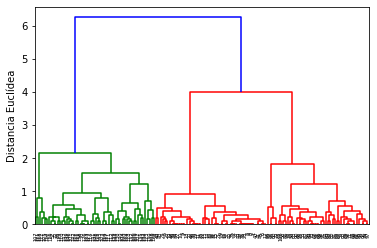

In [5]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Distancia Euclídea');

Alternativamente, podemos usar el `AgglomerativeClustering` de scikit-learn y dividr el dataset en 3 clases. ¿Puedes adivinar qué tres clases encontraremos?

In [10]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

prediction = ac.fit_predict(X)
print('Etiquetas de clase: %s\n' % prediction)

Etiquetas de clase: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



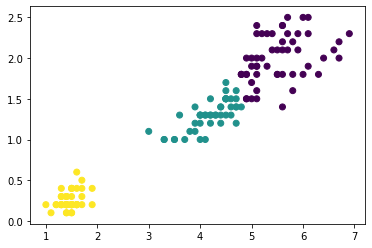

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=prediction);

# Clustering basado en densidades - DBSCAN

Otra forma útil de agrupamiento es la conocida como *Density-based Spatial Clustering of Applications with Noise* (DBSCAN). En esencia, podríamos pensar que DBSCAN es un algoritmo que divide el dataset en subgrupos, buscando regiones densas de puntos.

En DBSCAN, hay tres tipos de puntos:

- Puntos núcleo: puntos que tienen un mínimo número de puntos (MinPts) contenidos en una hiperesfera de radio epsilon.
- Puntos fronterizos: puntos que no son puntos núcleo, ya que no tienen suficientes puntos en su vecindario, pero si que pertenecen al vecindario de radio epsilon de algún punto núcleo.
- Puntos de ruido: todos los puntos que no pertenecen a ninguna de las categorías anteriores.

![](figures/dbscan.png)

Una ventaja de DBSCAN es que no tenemos que especificar el número de clusters a priori. Sin embargo, requiere que establezcamos dos hiper-parámetros adicionales que son ``MinPts`` y el radio ``epsilon``.

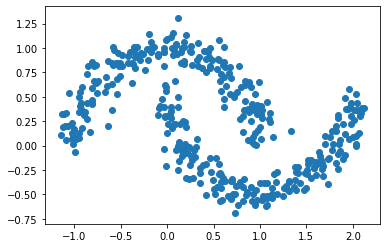

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=400,
                  noise=0.1,
                  random_state=1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Etiquetas predichas:
 [ 0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  0  0  1  1  0  1  0  0  0
  1  1  0  0  0  0  1  1  1  0  1  1  1  1  0  1  0  0  1  1  0  1  0  0
  0  0  1  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0  1
  0  0  1  0  1  1  1  0  1  1  0 -1  1  1  0  0  0  1  1  0  0  0  1  0
  0  0  0  1  1  0  1  1  1  0  1  0  0  0  1  0  1  0  1  1  0  0  1  0
  1  1  0  0  0  1  1  1  0  0  0  0  0  0  0  0  1  1  1  0  1  1  1  1
  1  1  1  1  1  1  0  1  1  1  0  0  1  1  1  0  1  0  0  1  0  1  1  0
  1  0  0  0  0  0  1  1  0  1  1  1  1  0  1  0  1  1  1  1  0  1  0  0
  0  1  0  1  1  0  1  1  0  1  0  0  0  1  1  1  0  1  0  1  0  0  0  1
  0  1  0  1  1  1  1  0  1  0  0  0  0  0  0  1  0  1  0  1  1 -1  0  0
  1  1  1  1  1  1  1  0  1  1  0  1  1  0  1  0  1  0  0  0  0  0  0  1
  0  0  0  1  1  1  1  0 -1  0  1  1  1  1  1  0  1  0  1  0  1  1  1  1
  1  0  1  0  1  0  1  0  0  1  0  1  0  1  0  1  0  1  0  0  1  0  1  1
  0  0  0  1  1  0  0  1  1  

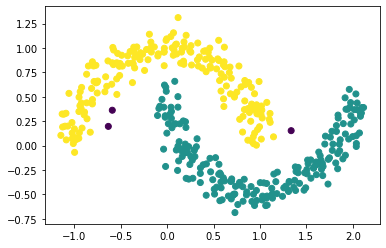

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
prediction = db.fit_predict(X)

print("Etiquetas predichas:\n", prediction)

plt.scatter(X[:, 0], X[:, 1], c=prediction);

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Usando el siguiente conjunto sintético, dos círculos concéntricos, experimenta los resultados obtenidos con los algoritmos de clustering que hemos considerado hasta el momento: `KMeans`, `AgglomerativeClustering` y `DBSCAN`.

¿Qué algoritmo reproduce o descubre mejor la estructura oculta (suponiendo que no conocemos `y`)?

¿Puedes razonar por qué este algoritmo funciona mientras que los otros dos fallan?
      </li>
    </ul>
</div>

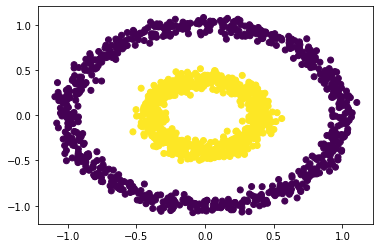

In [55]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, 
                    factor=.4, 
                    noise=.05)

plt.scatter(X[:, 0], X[:, 1], c=y);

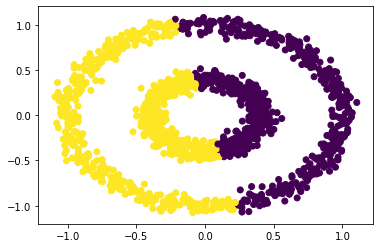

In [56]:
from sklearn.cluster import KMeans
clusters=2
kmeans = KMeans(n_clusters=clusters)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [57]:
from sklearn.metrics import adjusted_rand_score
print("Score:", adjusted_rand_score(y, labels))

Score: -0.0005533182859811186


Etiquetas de clase: [0 1 1 ... 0 0 1]

Score: 0.10612436401437737


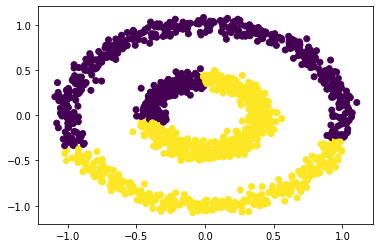

In [66]:
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

prediction = ac.fit_predict(X)
print('Etiquetas de clase: %s\n' % prediction)
plt.scatter(X[:, 0], X[:, 1], c=prediction)
print("Score:", adjusted_rand_score(y, prediction))

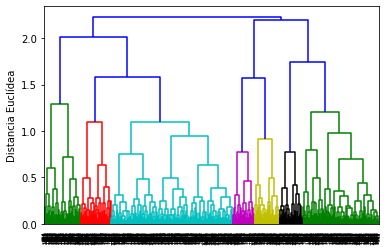

In [62]:
clusters = linkage(X, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Distancia Euclídea');

Etiquetas predichas:
 [0 0 1 ... 1 0 1]
Score: 1.0


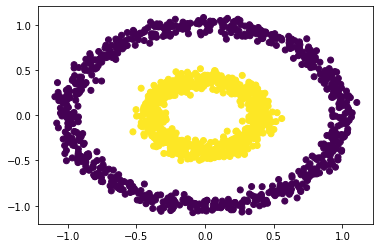

In [60]:
db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
prediction = db.fit_predict(X)

print("Etiquetas predichas:\n", prediction)

plt.scatter(X[:, 0], X[:, 1], c=prediction);
print("Score:",adjusted_rand_score(y, prediction))